### Importing required libraries

In [1]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
from IPython.display import display

### KmeanS function returns the new_cluster centroids and labels after running EM algorithm

In [2]:
def KmeanS(D,K):
    L = len(D)
    Old_Cl = []
    # Random select centroids of clusters from data points
    I = np.random.randint(0,L,K)
    for i in I:
        Old_Cl.append(D[i])
    New_Cl = Old_Cl.copy() 
    j = 0
   
    while(True):
        Cl = []
        labels = []
        for i in range(K):
            Cl.append([])
        Old_Cl = New_Cl.copy()
            # E-step
        for i in range(L):
            Dt = []
            for i1 in range(K):
                d = np.linalg.norm(np.array(list(Old_Cl[i1]))-np.array(list(D[i])))
                Dt.append(d)
            m = min(Dt)
            I = Dt.index(m)
            Cl[I].append(D[i])
            labels.append(I)
            # M-step
        for i in range(K):
            CUZ = list(zip(*Cl[i]))
            n = len(Cl[i])
            t = []
            for l in range(len(CUZ)):
                t.append(sum(CUZ[l])/n)
            New_Cl[i] = list(t)
        j += 1
        if(Old_Cl == New_Cl):
            break
    return New_Cl,labels

### Function which displays image after clustering based on clusters given by user

In [3]:
IMG = Image.open('flower.jpg')
print(IMG.size)
def IMG_CLUSTER(K,IMG):
    Cl = []
    Px = IMG.getdata()
    Fun,labels = KmeanS(list(Px),K)
    for i in range(K):
        CL = tuple(map(int,Fun[i]))
        Cl.append(CL)
    N_IMG = Image.new('RGB', IMG.size, "black")
    L = labels 
    j=0
    ND = list(N_IMG.getdata())
    for i in L:
        ND[j] = Cl[i]
        j += 1
    N_IMG.putdata(ND)
    print(IMG.size)
    display(IMG,N_IMG)

(284, 178)


### Image after classifying into 2 clusters 

(284, 178)


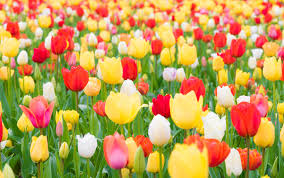

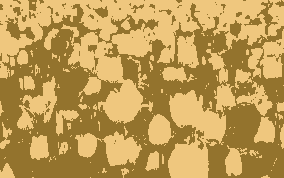

In [4]:
IMG_CLUSTER(2,IMG)

### Image after classifying into 3 clusters 

(284, 178)


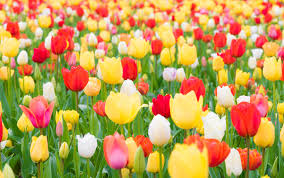

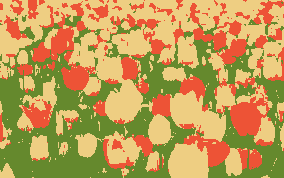

In [5]:
IMG_CLUSTER(3,IMG)

### Image after classifying into 5 clusters 

(284, 178)


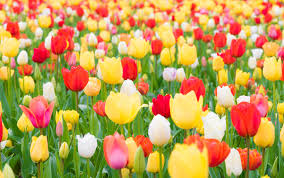

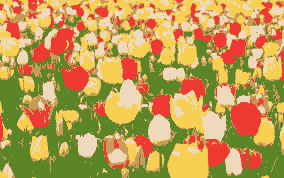

In [6]:
IMG_CLUSTER(5,IMG)

### Image after classifying into 10 clusters 

(284, 178)


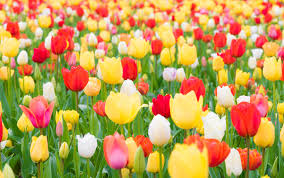

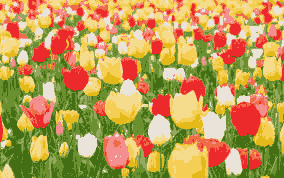

In [7]:
IMG_CLUSTER(10,IMG)